# AWS Glue Studio Notebook
##### You are now running a AWS Glue Studio notebook; To start using your notebook you need to start an AWS Glue Interactive Session.


#### Optional: Run this cell to see available notebook commands ("magics").


In [ ]:
%help

####  Run this cell to set up and start your interactive session.


In [1]:
%idle_timeout 2880
%glue_version 5.0
%worker_type G.1X
%number_of_workers 5

import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job
  
sc = SparkContext.getOrCreate()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)

Welcome to the Glue Interactive Sessions Kernel
For more information on available magic commands, please type %help in any new cell.

Please view our Getting Started page to access the most up-to-date information on the Interactive Sessions kernel: https://docs.aws.amazon.com/glue/latest/dg/interactive-sessions.html
Installed kernel version: 1.0.7 
Current idle_timeout is None minutes.
idle_timeout has been set to 2880 minutes.
Setting Glue version to: 5.0
Previous worker type: None
Setting new worker type to: G.1X
Previous number of workers: None
Setting new number of workers to: 5
Trying to create a Glue session for the kernel.
Session Type: glueetl
Worker Type: G.1X
Number of Workers: 5
Idle Timeout: 2880
Session ID: 8a79ef5b-7979-46fd-a08a-04775f487086
Applying the following default arguments:
--glue_kernel_version 1.0.7
--enable-glue-datacatalog true
Waiting for session 8a79ef5b-7979-46fd-a08a-04775f487086 to get into ready status...
Session 8a79ef5b-7979-46fd-a08a-04775f487086 ha

#### Example: Create a DynamicFrame from a table in the AWS Glue Data Catalog and display its schema


In [ ]:
dyf = glueContext.create_dynamic_frame.from_catalog(database='database_name', table_name='table_name')
dyf.printSchema()

#### Example: Convert the DynamicFrame to a Spark DataFrame and display a sample of the data


In [ ]:
df = dyf.toDF()
df.show()

#### Example: Visualize data with matplotlib


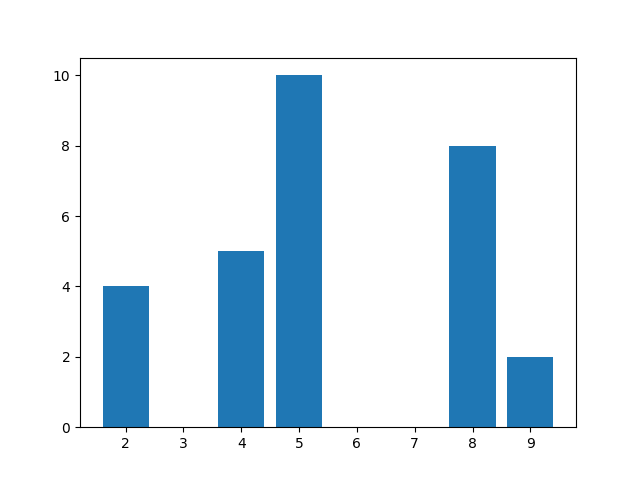

In [2]:
import matplotlib.pyplot as plt

# Set X-axis and Y-axis values
x = [5, 2, 8, 4, 9]
y = [10, 4, 8, 5, 2]
  
# Create a bar chart 
plt.bar(x, y)
  
# Show the plot
%matplot plt

#### Example: Write the data in the DynamicFrame to a location in Amazon S3 and a table for it in the AWS Glue Data Catalog


In [ ]:
s3output = glueContext.getSink(
  path="s3://bucket_name/folder_name",
  connection_type="s3",
  updateBehavior="UPDATE_IN_DATABASE",
  partitionKeys=[],
  compression="snappy",
  enableUpdateCatalog=True,
  transformation_ctx="s3output",
)
s3output.setCatalogInfo(
  catalogDatabase="demo", catalogTableName="populations"
)
s3output.setFormat("glueparquet")
s3output.writeFrame(DyF)

In [3]:
#importing necessary library
import pandas as pd

In [4]:
mc=pd.read_csv('s3://humanaproject/humana_mays_target_member_conditions.csv')

In [5]:
mc.head()

   cond_key chronicity  ... membership_year      id
0       226    Chronic  ...            2023  993642
1        94    Chronic  ...            2023  993642
2       329    Chronic  ...            2023  993642
3        81    Chronic  ...            2023  803124
4        47    Chronic  ...            2023  803124

[5 rows x 7 columns]


In [6]:
mc['condition']=mc.apply(lambda x: x['cond_desc'].split(',', 1)[0].replace(' ','_'), axis=1)

In [7]:
aggregated_categories = {
    "Cardiovascular_Diseases": ['Heart_Failure', 'Acute_on_Chronic_Heart_Failure', 'Congestive_Heart_Failure',
                                'Specified_Heart_Arrhythmias', 'Angina_Pectoris', 'Cardiomyopathy/Myocarditis',
                                'End-Stage_Heart_Failure'],

    "Diabetes_Related": ['Diabetes_with_Chronic_Complications', 'Diabetes_without_Complication',
                         'Diabetes_with_Glycemic', 'Proliferative_Diabetic_Retinopathy_and_Vitreous_Hemorrhage',
                         'Diabetes_with_Severe_Acute_Complications', 'Severe_Diabetic_Eye_Disease'],

    "Kidney_and_Liver_Diseases": ['Chronic_Kidney_Disease', 'Dialysis_Status', 'Chronic_Liver_Failure/End-Stage_Liver_Disorders',
                                  'Cirrhosis_of_Liver', 'Chronic_Hepatitis'],

    "Respiratory_Diseases": ['Chronic_Obstructive_Pulmonary_Disease', 'Severe_Persistent_Asthma',
                              'Fibrosis_of_Lung_and_Other_Chronic_Lung_Disorders', 'Idiopathic_Pulmonary_Fibrosis_and_Lung_Involvement_in_Systemic_Sclerosis'],

    "Cancers": ['Lung_and_Other_Severe_Cancers', 'Lymphoma_and_Other_Cancers', 'Breast', 'Prostate',
                'Colorectal', 'Cancer_Metastatic_to_Bone', 'Cancer_Metastatic_to_Lung', 'Metastatic_Cancer_and_Acute_Leukemia'],

    "Mental_Health_Disorders": ['Major_Depressive', 'Bipolar_Disorders_without_Psychosis', 'Schizophrenia',
                                'Reactive_and_Unspecified_Psychosis', 'Personality_Disorders',
                                'Substance_Use_Disorder', 'Drug_Use_Disorder', 'Alcohol_Use_Disorder'],

    "Neurological_Disorders": ['Parkinson_and_Other_Degenerative_Disease_of_Basal_Ganglia', 'Seizure_Disorders_and_Convulsions',
                               'Multiple_Sclerosis', 'Cerebral_Palsy', 'Quadriplegic_Cerebral_Palsy'],

    "Immunological_Disorders": ['Disorders_of_Immunity', 'Systemic_Lupus_Erythematosus_and_Other_Specified_Systemic_Connective_Tissue_Disorders',
                                'Chronic_Inflammatory_Demyelinating_Polyneuritis_and_Multifocal_Motor_Neuropathy',
                                'Rheumatoid_Arthritis_and_Other_Specified_Inflammatory_Rheumatic_Disorders',
                                'Rheumatoid_Arthritis_and_Inflammatory_Connective_Tissue_Disease', 'Specified_Immunodeficiencies_and_White_Blood_Cell_Disorders'],

    "Miscellaneous": ['Morbid_Obesity', 'Amputation_Status', 'Chronic_Ulcer_of_Skin', 'Artificial_Openings_for_Feeding_or_Elimination',
                      'Pressure_Ulcer_of_Skin_with_Partial_Thickness_Skin_Loss']
}

In [8]:
def agg_condition(x,aggregated_categories=aggregated_categories):
    for k , v in aggregated_categories.items():
        if x in v:
            return k
    return 'other'

In [9]:
mc['condition_agg']=mc['condition'].apply(agg_condition)

In [11]:
mc_agg = mc.pivot_table(index='id',columns='condition_agg',  values='membership_year',aggfunc='count').fillna(0)

In [12]:
import sys
from awsglue.context import GlueContext
from awsglue.transforms import *
from awsglue.dynamicframe import DynamicFrame
from pyspark.context import SparkContext

# Initialize Spark and Glue Context
sc = SparkContext.getOrCreate()
glueContext = GlueContext(sc)


# Convert Pandas DataFrame to Spark DataFrame
spark_df = glueContext.spark_session.createDataFrame(mc_agg)

# Convert Spark DataFrame to Glue DynamicFrame
dynamic_df = DynamicFrame.fromDF(spark_df, glueContext, "dynamic_df")

# Specify the S3 path where the file should be stored
output_path = "s3://humanaproject/staging_temp/member_conditions/"

# Write the DynamicFrame to S3 in CSV format
glueContext.write_dynamic_frame.from_options(
    frame=dynamic_df,
    connection_type="s3",
    connection_options={"path": output_path},
    format="csv"
)

print(f"Data successfully written to {output_path}")


Data successfully written to s3://humanaproject/staging_temp/member_conditions/
